# In Class Notebook, Week 04

You can click on the GitHub URL of this notebook to access the file in near-real time: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/blob/master/week04/inClass_week04.ipynb 

Or you can copy-paste into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [5]:
# import our usual things
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets
import matplotlib

In [3]:
michigan_file = '/Users/jnaiman/Downloads/michigan_lld.flt'
michigan= np.fromfile(michigan_file,dtype='f4').reshape((5365,4201))
# shape and datatype info from: https://www.ngdc.noaa.gov/mgg/greatlakes/michigan.html

In [4]:
michigan[michigan==-9999]=np.nan

/Users/jnaiman/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


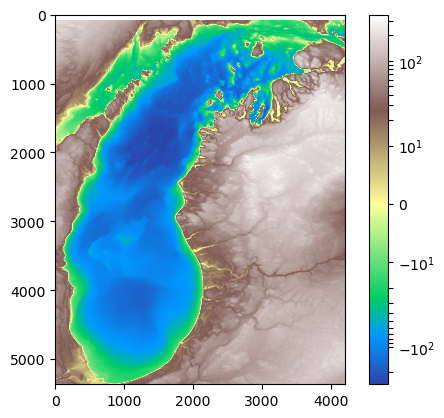

In [6]:
# step 1: hard-code some options we might want to change later interactively
colormap_name = 'terrain'
take_log = True

if take_log:
    norm = matplotlib.colors.SymLogNorm(10) # symmetric log
else:
    norm = matplotlib.colors.Normalize() # linear color map
    
plt.imshow(michigan, cmap=colormap_name, norm=norm)
plt.colorbar()
plt.clim(-352,352)
plt.show()

In [7]:
# step 2: put hardcoded values into a function
#colormap_name = 'terrain'
#take_log = True

def michigan_plot(colormap_name, take_log=True):
    # on mac: COMMAND ]
    # on windows: CMD ]
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10) # symmetric log
    else:
        norm = matplotlib.colors.Normalize() # linear color map

    plt.imshow(michigan, cmap=colormap_name, norm=norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

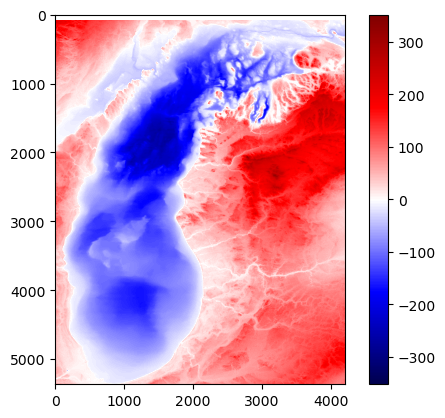

In [8]:
# 2.5 try it out!
michigan_plot('seismic',take_log=False)

/Users/jnaiman/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  if __name__ == "__main__":


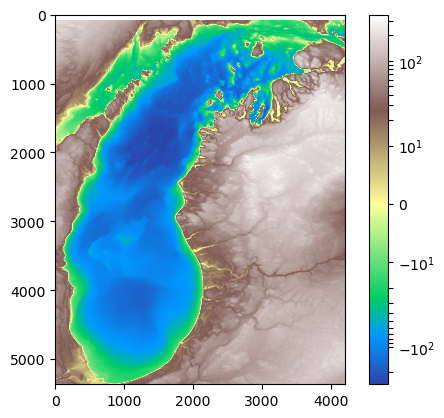

In [9]:
michigan_plot('terrain',take_log=True)

In [10]:
# step 3 -- decorate our function with a ipywidgets.interact

@ipywidgets.interact(colormap_name=plt.colormaps(),take_log=True)
def michigan_plot(colormap_name, take_log=True):
    # on mac: COMMAND ]
    # on windows: CMD ]
    if take_log:
        norm = matplotlib.colors.SymLogNorm(10) # symmetric log
    else:
        norm = matplotlib.colors.Normalize() # linear color map

    plt.imshow(michigan, cmap=colormap_name, norm=norm)
    plt.colorbar()
    plt.clim(-352,352)
    plt.show()

interactive(children=(Dropdown(description='colormap_name', options=('Accent', 'Accent_r', 'Blues', 'Blues_r',…

In [13]:
buildings = pd.read_csv('https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/building_inventory.csv',
                       na_values={'Square Footage':0,
                                 'Year Acquired':0,
                                 'Year Constructed':0,
                                 'Floors':0})

In [14]:
stats = buildings.groupby("Year Acquired")["Square Footage"].describe()

In [15]:
stats

count           mean           std       min       25%  \
Year Acquired                                                           
1753.0           1.0    1200.000000           NaN    1200.0    1200.0   
1802.0           2.0    2220.000000   1943.129435     846.0    1533.0   
1810.0           3.0    1344.333333   1809.945948     216.0     300.5   
1832.0           1.0  120000.000000           NaN  120000.0  120000.0   
1837.0           1.0   10302.000000           NaN   10302.0   10302.0   
...              ...            ...           ...       ...       ...   
2015.0          20.0   15254.650000  29153.085290     144.0     696.0   
2016.0          10.0   30483.900000  61864.180491    1152.0    2464.0   
2017.0           1.0    6720.000000           NaN    6720.0    6720.0   
2018.0           4.0    4290.000000   5153.644342    1455.0    1455.0   
2019.0           2.0     760.000000      0.000000     760.0     760.0   

                    50%        75%       max  
Year Acquired                                 
1753.0           1200.0    1200.00    1200.0  
1802.0           2220.0    2907.00    3594.0  
1810.0            385.0    1908.50    3432.0  
1832.0         120000.0  120000.00  120000.0  
1837.0          10302.0   10302.00   10302.0  
...                 ...        ...       ...  
2015.0           3152.0   10590.25  105000.0  
2016.0           3352.5    3793.00  184000.0  
2017.0           6720.0    6720.00    6720.0  
2018.0           1852.5    4687.50   12000.0  
2019.0            760.0     760.00     760.0  

[171 rows x 8 columns]

In [16]:
@ipywidgets.interact(style=plt.style.available)
def make_plot(style):
    with plt.style.context(style):
        fig,ax = plt.subplots(1,1,figsize=(4,2))
        ax.plot(stats['max'],marker='.',label='Max')
        ax.plot(stats['min'],marker='.',label='Min')
        ax.set_xlabel('Year')
        ax.set_yscale('log')
        plt.show()

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

## More about widget types

In [17]:
itext = ipywidgets.IntText() # integer text widget
itext

IntText(value=0)

In [19]:
itext.value

34

In [21]:
ip = ipywidgets.IntProgress(value=50)
ip

IntProgress(value=50)

In [22]:
irange = ipywidgets.IntSlider(min=0,max=100,step=1)
irange

IntSlider(value=0)

In [23]:
ip.keys # what are all of the possible traites in the progress bar?

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'bar_style',
 'description',
 'description_tooltip',
 'layout',
 'max',
 'min',
 'orientation',
 'style',
 'value']

In [24]:
irange.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [25]:
ipywidgets.jslink?

In [26]:
ipywidgets.jslink((ip,'value'),(irange,'value'))

Link(source=(IntProgress(value=50), 'value'), target=(IntSlider(value=9), 'value'))

In [27]:
ip

IntProgress(value=50)

In [28]:
irange

IntSlider(value=50)

In [29]:
ipywidgets.VBox([ip,irange])

In [30]:
ip2 = ipywidgets.IntProgress(value=90) # integer progress bar
irange2 = ipywidgets.IntSlider(min=0,max=100,step=1)
ipywidgets.link((ip2,'value'),(irange2,'value'))
ipywidgets.VBox([ip2,irange2])

In [31]:
ipywidgets.link?

In [32]:
button = ipywidgets.Button(description='I am a button!')
button

Button(description='I am a button!', style=ButtonStyle())

I have clicked!
I have clicked!
I have clicked!


In [33]:
def say_click(event): # what is this event thing??
    print("I have clicked!")

In [34]:
button.on_click(say_click) # observing for changes in the button traits and then running
                           # the say_click function when the button is clicked

## A bit of a more complex dashboard

In [35]:
ip = ipywidgets.IntProgress()
ip

IntProgress(value=0)

In [36]:
button_plus = ipywidgets.Button(description='+10')
button_minus = ipywidgets.Button(description='-10')

In [37]:
ipywidgets.HBox([button_minus,ip,button_plus])

In [38]:
ip.value

0

In [39]:
def click_minus(event): # event??
    ip.value -= 10

In [40]:
button_minus.on_click(click_minus)

In [41]:
def click_plus(event): # event??
    ip.value += 10

In [42]:
button_plus.on_click(click_plus)

### More linking examples (beyond values): color picker and sliders

In [43]:
islider = ipywidgets.IntSlider(min=0,max=10,step=1, orientation='vertical')

In [44]:
islider

IntSlider(value=0, max=10, orientation='vertical')

In [45]:
islider.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [47]:
islider.value

7

In [48]:
islider.style.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description_width',
 'handle_color']

In [52]:
islider.style.handle_color = "#FFCCFF"

In [53]:
islider

IntSlider(value=6, max=10, orientation='vertical', style=SliderStyle(handle_color='#FFCCFF'))

In [54]:
cp = ipywidgets.ColorPicker()
cp

ColorPicker(value='black')

In [55]:
cp.value

'#f37725'

In [56]:
ipywidgets.link((cp,'value'),(islider.style,'handle_color'))

In [57]:
ipywidgets.VBox([cp,islider])

## Traitlets

In [58]:
class MyObject():
    name = 'unnamed'
    age = 0

In [59]:
my_obj = MyObject()

In [60]:
my_obj.name, my_obj.age

('unnamed', 0)

In [61]:
my_obj.name = 'Bob'
my_obj.age = 47

In [62]:
print('Hello, my name is', my_obj.name, 'and I am', my_obj.age, 'years old')

Hello, my name is Bob and I am 47 years old


In [63]:
my_obj.name = 'Linda'
my_obj.age = 45

In [64]:
print('Hello, my name is', my_obj.name, 'and I am', my_obj.age,'years old')

Hello, my name is Linda and I am 45 years old


In [65]:
import traitlets

In [66]:
class MyTraitletObject(traitlets.HasTraits):
    name = traitlets.Unicode('unnamed') # traitlets kind of string
    age = traitlets.Int(0) # traitlets kind of integer

In [67]:
myobjt = MyTraitletObject()

In [68]:
myobjt.age = 47
myobjt.name = 'Bob'

In [69]:
print('Hello, my name is', myobjt.name, 'and I am', myobjt.age,'years old')

Hello, my name is Bob and I am 47 years old


In [70]:
def name_changed(change):
    print(change) # required form of traitlet objects
    
myobjt.observe(name_changed,['name']) 
# "observing" for changes in the "name" trait and then running the "name_changed" function
#. when changes occur

In [71]:
myobjt.name = 'Linda'

{'name': 'name', 'old': 'Bob', 'new': 'Linda', 'owner': <__main__.MyTraitletObject object at 0x7fd5e889e810>, 'type': 'change'}


In [73]:
def name_changed2(change):
    print('Hello, my name is', change['new'], 'and I am', change['owner'].age, 'years old')
myobjt.observe(name_changed2, ['name'])

In [74]:
myobjt.name = 'Gene'

{'name': 'name', 'old': 'Linda', 'new': 'Gene', 'owner': <__main__.MyTraitletObject object at 0x7fd5e889e810>, 'type': 'change'}
Hello, my name is Gene and I am 47 years old


In [76]:
# one way around this
# myobjt = MyTraitletObject()
# re-link using the name_changed2

myobjt.unobserve(name_changed,['name'])

In [77]:
myobjt.name = 'Bob'

Hello, my name is Bob and I am 47 years old


In [78]:
def age_changed(change):
    print('Hello, my name is', change['owner'].name, 'and I am', change['new'], 'years old')
myobjt.observe(age_changed,['age'])

In [79]:
myobjt.age = 45

Hello, my name is Bob and I am 45 years old


In [80]:
myobjt.name = 'Linda'

Hello, my name is Linda and I am 45 years old


## Matplotlib-like interface in bqplot 
(not the way we are really going to use it (sorry!) but worth knowing about)

In [87]:
import bqplot.pyplot as bplt
import bqplot

In [82]:
data = np.random.random((10,10))

In [84]:
data.shape

(10, 10)

In [85]:
fig = bplt.figure(padding_y=0.0)

head_map = bplt.gridheatmap(data)

fig

Figure(axes=[ColorAxis(scale=ColorScale()), Axis(orientation='vertical', scale=OrdinalScale(reverse=True)), Ax…

In [88]:
fig = bplt.figure(padding_y=0.0)

bplt.scales(scales={'color':bqplot.ColorScale(scheme='Greens')})

heat_map = bplt.gridheatmap(data)

fig

Figure(axes=[ColorAxis(scale=ColorScale(scheme='Greens')), Axis(orientation='vertical', scale=OrdinalScale(rev…

In [89]:
fig = bplt.figure(padding_y=0.0) # similar to fig,ax = plt.subplots

# a little weird, but sort of like a ax.set_ function
bplt.scales(scales={'color':bqplot.ColorScale(scheme='Greens')})

# ax.imshow -ish
heat_map = bplt.gridheatmap(data, 
                           interactions={'click':'select'},
                           selected_style={'fill':'magenta'})

# just showing the figure, plt.show
fig

Figure(axes=[ColorAxis(scale=ColorScale(scheme='Greens')), Axis(orientation='vertical', scale=OrdinalScale(rev…

In [90]:
data3d = np.random.random((10,10,20))

In [91]:
data3d.shape

(10, 10, 20)

## One more cool way of organizing widgets

In [94]:
tx1 = ipywidgets.Textarea("Hello, I am a text box, #1")

In [95]:
tx1

Textarea(value='Hello, I am a text box, #1')

In [96]:
tx2 = ipywidgets.Textarea("Hello, I am a text box, #2")
tx3 = ipywidgets.Textarea("Hello, I am a text box, #3")
tx4 = ipywidgets.Textarea("Hello, I am a text box, #4")

In [97]:
ipywidgets.VBox([tx1,tx2,tx3,tx4])

In [98]:
ipywidgets.VBox( [ipywidgets.HBox([tx1,tx2]),ipywidgets.HBox([tx3,tx4])] )

In [99]:
box1 = ipywidgets.HBox([tx1,tx2])
box2 = ipywidgets.HBox([tx3,tx4])
ipywidgets.VBox([box1,box2])

In [101]:
tabs = ipywidgets.Tab([tx1,tx2,tx3,tx4])
tabs

In [103]:
acc = ipywidgets.Accordion([tx1,tx2,tx3,tx4])
acc

Accordion(children=(Textarea(value='Hello, I am a text box, #1'), Textarea(value='Hello, I am a text box, #2')…

## Some ideas that will (hopefully) be useful for the homework

In [104]:
bf = pd.read_csv('https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/bfro_reports_fall2022.csv',
                parse_dates = ["date"])

In [105]:
bf

observed  \
0     Ed L. was salmon fishing with a companion in P...   
1     heh i kinda feel a little dumb that im reporti...   
2     I was on my way to Claremont from Lebanon on R...   
3     I was northeast of Macy Nebraska along the Mis...   
4     While this incident occurred a long time ago, ...   
...                                                 ...   
4742  My cousin and I were camping way out in the wo...   
4743  While backpacking near the horse trails and ac...   
4744  My wife and I were camping At Yellowood State ...   
4745  My wife and I were driving to Indianapolis to ...   
4746  It was about 7:00 PM in September. It was stil...   

                                       location_details  \
0                     East side of Prince William Sound   
1     the road is off us rt 80, i dont know the exit...   
2     Close to Claremont down 120 not far from Kings...   
3         Latitude & Longitude :  42.158230  -96.344197   
4     Ward County, Just outside of a the Minuteman T...   
...                                                 ...   
4742  Indiana, Brown County, Elkinsville, Lake Monro...   
4743  Near Bedford south of Brown County in the Hoos...   
4744  Yellowood State Park. Off of highway 46 in bet...   
4745  On Interstate 65 in Indiana somewhere around t...   
4746  Blackford County, Indiana located in the south...   

                              county          state  season  \
0     Valdez-Chitina-Whittier County         Alaska    Fall   
1                      Warren County     New Jersey    Fall   
2                    Sullivan County  New Hampshire  Summer   
3                    Thurston County       Nebraska  Spring   
4                        Ward County   North Dakota  Spring   
...                              ...            ...     ...   
4742                    Brown County        Indiana  Spring   
4743                    Brown County        Indiana  Winter   
4744                    Brown County        Indiana  Summer   
4745                    Boone County        Indiana  Winter   
4746                Blackford County        Indiana  Summer   

                                                  title  latitude  longitude  \
0                                                   NaN       NaN        NaN   
1                                                   NaN       NaN        NaN   
2     Report 55269: Dawn sighting at Stevens Brook o...  43.41549  -72.33093   
3     Report 59757: Possible daylight sighting of a ...  42.15685  -96.34203   
4     Report 751: Hunter describes described being s...  48.25422 -101.31660   
...                                                 ...       ...        ...   
4742                                                NaN       NaN        NaN   
4743                                                NaN       NaN        NaN   
4744  Report 49480: Campers hear possible vocalizati...  39.17909  -86.33560   
4745                                                NaN       NaN        NaN   
4746                                                NaN       NaN        NaN   

           date   number  ... precip_intensity precip_probability  \
0           NaT   1261.0  ...              NaN                NaN   
1           NaT    438.0  ...              NaN                NaN   
2    2016-06-07  55269.0  ...            0.001                0.7   
3    2018-05-25  59757.0  ...            0.000                0.0   
4    2000-04-21    751.0  ...              NaN                NaN   
...         ...      ...  ...              ...                ...   
4742        NaT   2460.0  ...              NaN                NaN   
4743        NaT   2461.0  ...              NaN                NaN   
4744 2015-08-08  49480.0  ...            0.000                0.0   
4745        NaT   2459.0  ...              NaN                NaN   
4746        NaT   2458.0  ...              NaN                NaN   

      precip_type  pressure                            summary  uv_index  \
0     

In [106]:
bf.columns

Index(['observed', 'location_details', 'county', 'state', 'season', 'title',
       'latitude', 'longitude', 'date', 'number', 'classification', 'geohash',
       'temperature_high', 'temperature_mid', 'temperature_low', 'dew_point',
       'humidity', 'cloud_cover', 'moon_phase', 'precip_intensity',
       'precip_probability', 'precip_type', 'pressure', 'summary', 'uv_index',
       'visibility', 'wind_bearing', 'wind_speed', 'location'],
      dtype='object')

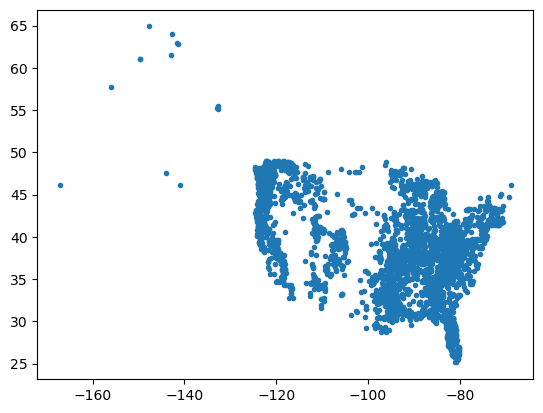

In [107]:
plt.plot(bf['longitude'], bf['latitude'],'.')
plt.show()

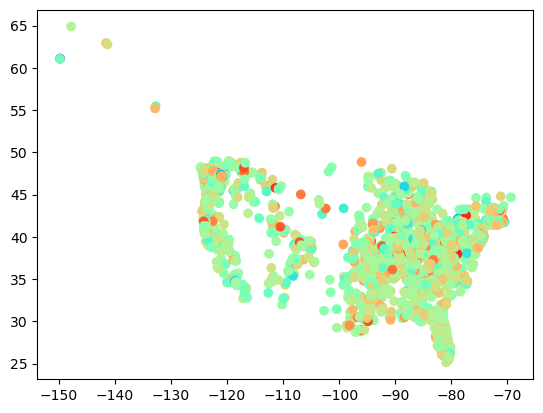

In [111]:
plt.scatter(bf['longitude'],bf['latitude'], c=np.log10(bf['pressure']),cmap='rainbow')
plt.show()

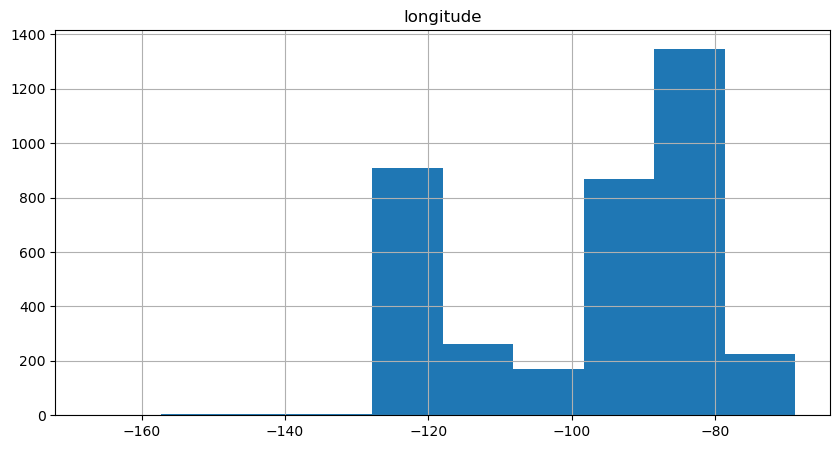

In [113]:
fig, ax = plt.subplots(figsize=(10,5))
bf.hist(column='longitude',ax=ax)
plt.show()

In [114]:
bf.hist?